In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [66]:
df = pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [67]:
#droping unwated columns

df1 = df.drop(["nameOrig","nameDest","step","isFlaggedFraud"],axis=1)
df1.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [68]:
df1["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<AxesSubplot:ylabel='type'>

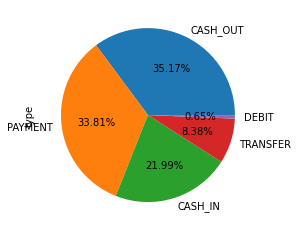

In [14]:
df1["type"].value_counts().plot(kind="pie", autopct="%.2f%%")

<AxesSubplot:xlabel='isFraud', ylabel='count'>

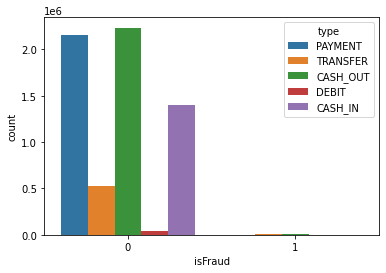

In [13]:
sns.countplot(data=df1, x="isFraud", hue="type")


In [69]:
df1.pivot_table(values='amount',index='type',columns='isFraud',aggfunc='count')

isFraud,0,1
type,,
CASH_IN,1399284.0,NaN
CASH_OUT,2233384.0,4116.0
DEBIT,41432.0,NaN
PAYMENT,2151495.0,NaN
TRANSFER,528812.0,4097.0


In [70]:
df2 = df1[df1.type.isin(['CASH_OUT','TRANSFER'])]
df2.pivot_table(values='amount',index='type',columns='isFraud',aggfunc='count')


isFraud,0,1
type,,
CASH_OUT,2233384,4116
TRANSFER,528812,4097


In [71]:
encoder = LabelEncoder()
df2['type']= encoder.fit_transform(df2['type'])
df2['type'].unique()


C:\Users\hp\AppData\Local\Temp\ipykernel_14132\3312364577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['type']= encoder.fit_transform(df2['type'])


array([1, 0])

In [73]:
 df2.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,181.00,181.0,0.0,0.0,0.00,1
3,0,181.00,181.0,0.0,21182.0,0.00,1
15,0,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,215310.30,705.0,0.0,22425.0,0.00,0
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [74]:
df2.isnull().sum()


type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [75]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int32  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
dtypes: float64(5), int32(1), int64(1)
memory usage: 158.5 MB


In [76]:
# dependent and independent variable
X = df2.drop(["isFraud"], axis=1)
y = df2["isFraud"]


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= False)


In [78]:
model = LogisticRegression()


In [79]:
model.fit(X_train,y_train)

LogisticRegression()

In [80]:
model.score(X_test,y_test)

0.9974137402045185

In [81]:
predicted = model.predict(X_test)
cm = confusion_matrix(y_test,predicted)
cm

array([[551470,    976],
       [   457,   1179]], dtype=int64)

Text(33.0, 0.5, 'actuals')

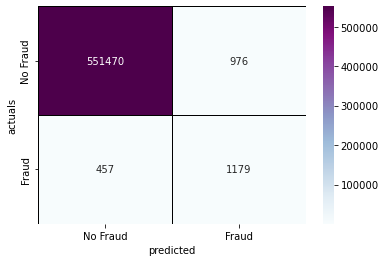

In [84]:
sns.heatmap(cm,annot=True,fmt='d',cmap='BuPu',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [85]:
print(classification_report(y_test,predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552446
           1       0.55      0.72      0.62      1636

    accuracy                           1.00    554082
   macro avg       0.77      0.86      0.81    554082
weighted avg       1.00      1.00      1.00    554082



In [86]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

In [89]:
if True:
    probabilities = clf.fit(X_train, y_train.values.ravel()).predict(X_test)

In [90]:
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(y_test,probabilities))

0.7681496611293948


In [91]:
from sklearn.tree import DecisionTreeClassifier


In [93]:

DT =DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred= DT.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552483
           1       0.89      0.91      0.90      1599

    accuracy                           1.00    554082
   macro avg       0.95      0.96      0.95    554082
weighted avg       1.00      1.00      1.00    554082



In [94]:
cm = confusion_matrix(y_test,y_pred)


Text(33.0, 0.5, 'actuals')

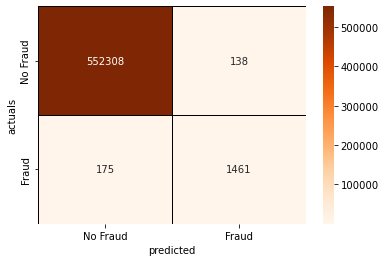

In [95]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel("predicted")
plt.ylabel("actuals")


We can conclude that Decision Tree and Logistic Regression in giving more acurate result than RandomForest 